# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [131]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
lat_lngs_list = list(lat_lngs)
# len(cities)
print(len(cities))

620


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [132]:
# Beginning statement and URL link
print("Beginning Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
# Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Beginning Data Retrieval 
-----------------------------
Processing record 1|namibe
Processing record 2|ishigaki
Processing record 3|lorengau
Processing record 4|rikitea
Processing record 5|svetlyy yar
Processing record 6|chuy
Processing record 7|mataura
Processing record 8|severo-kurilsk
Processing record 9|salvador
Processing record 10|hithadhoo
Processing record 11|tiarei
Processing record 12|kaseda
City not found. skipping.
Processing record 13|butaritari
Processing record 14|saint-philippe
Processing record 15|ahuas
Processing record 16|huautla
Processing record 17|myanaung
Processing record 18|biskamzha
Processing record 19|vila franca do campo
Processing record 20|caravelas
Processing record 21|busselton
Processing record 22|manakara
Processing record 23|tuktoyaktuk
Processing record 24|graaff-reinet
Processing record 25|atuona
Processing record 26|punta arenas
Processing record 27|saskylakh
Processing record 28|bredasdorp
Processing record 29|alpoyeca
Processing record 30|port a

Processing record 246|port elizabeth
Processing record 247|krasnotorka
Processing record 248|yozgat
Processing record 249|cabo san lucas
City not found. skipping.
Processing record 250|zinder
City not found. skipping.
Processing record 251|praia da vitoria
Processing record 252|kaitangata
Processing record 253|iseyin
Processing record 254|urumqi
Processing record 255|qinnan
Processing record 256|yabrud
Processing record 257|savelugu
Processing record 258|amuntai
Processing record 259|mount isa
City not found. skipping.
Processing record 260|tautira
Processing record 261|villaviciosa
Processing record 262|mayumba
Processing record 263|beringovskiy
Processing record 264|pitimbu
City not found. skipping.
Processing record 265|hauterive
Processing record 266|alibag
Processing record 267|salalah
Processing record 268|aksha
Processing record 269|daur
Processing record 270|artyom
Processing record 271|beruwala
Processing record 272|darovskoy
Processing record 273|constitucion
Processing recor

Processing record 498|pisco
Processing record 499|bulawayo
Processing record 500|lyubech
Processing record 501|ridgecrest
Processing record 502|barra do bugres
Processing record 503|kemijarvi
Processing record 504|nelson
Processing record 505|inuvik
Processing record 506|palau
Processing record 507|hobyo
Processing record 508|itarema
Processing record 509|broome
Processing record 510|anderson
City not found. skipping.
Processing record 511|xuanhua
Processing record 512|bogale
Processing record 513|muros
Processing record 514|conceicao do araguaia
Processing record 515|paraul
Processing record 516|senador guiomard
Processing record 517|miri
Processing record 518|yatsuo
Processing record 519|nanortalik
Processing record 520|surt
Processing record 521|richards bay
Processing record 522|shimoda
Processing record 523|meulaboh
Processing record 524|san jose
Processing record 525|lolodorf
Processing record 526|binga
Processing record 527|khandbari
Processing record 528|belaya gora
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [133]:
# Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

# Exporting data to csv
city_df.to_csv("../output_data/cities.csv")

# Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Mossamedes,100,AO,1611461997,70,-15.1961,12.1522,75.02,5.23
1,Ishigaki,75,JP,1611462200,68,24.3448,124.1572,66.20,18.41
2,Lorengau,81,PG,1611462200,62,-2.0226,147.2712,85.55,3.02
3,Rikitea,0,PF,1611462200,65,-23.1203,-134.9692,79.54,7.52
4,Svetlyy Yar,0,RU,1611462200,93,48.4748,44.7810,33.01,8.95


In [134]:
# Count data
city_df.count()

City          574
Cloudiness    574
Country       574
Date          574
Humidity      574
Lat           574
Lng           574
Max Temp      574
Wind Speed    574
dtype: int64

In [135]:
# Display the data frame
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Mossamedes,100,AO,1611461997,70,-15.1961,12.1522,75.02,5.23
1,Ishigaki,75,JP,1611462200,68,24.3448,124.1572,66.20,18.41
2,Lorengau,81,PG,1611462200,62,-2.0226,147.2712,85.55,3.02
3,Rikitea,0,PF,1611462200,65,-23.1203,-134.9692,79.54,7.52
4,Svetlyy Yar,0,RU,1611462200,93,48.4748,44.7810,33.01,8.95
...,...,...,...,...,...,...,...,...,...
569,Araouane,41,ML,1611462042,23,18.9048,-3.5265,60.42,10.56
570,Okhotsk,100,RU,1611462245,81,59.3833,143.3000,-10.77,10.69
571,Morogoro,75,TZ,1611462245,94,-6.8167,37.6667,71.60,5.75


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

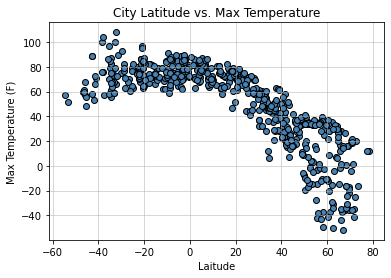

In [139]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save image
plt.savefig("../output_data/Latitude_vs_temperature_plot")

## Latitude vs. Humidity Plot

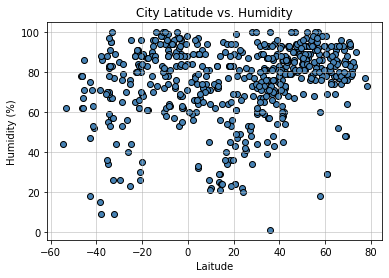

In [140]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_df["Lat"], city_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save image
plt.savefig("../output_data/Latitude_vs_humidity_plot")

## Latitude vs. Cloudiness Plot

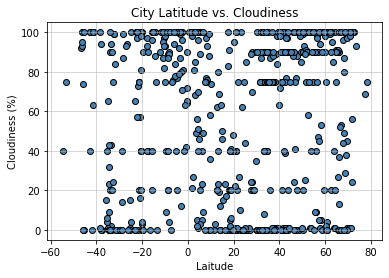

In [141]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_df["Lat"], city_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save image
plt.savefig("../output_data/Latitude_vs_cloudiness_plot")

## Latitude vs. Wind Speed Plot

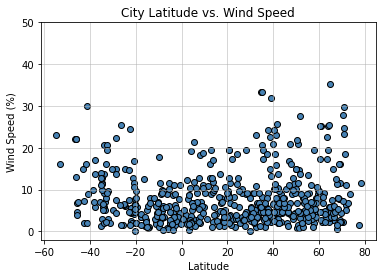

In [159]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_df["Lat"], city_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save image
plt.savefig("../output_data/Latitude_vs_windspeed_plot")

## Linear Regression

In [143]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

In [144]:
# Define function for creating linear agression and scatter plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8488347627539207


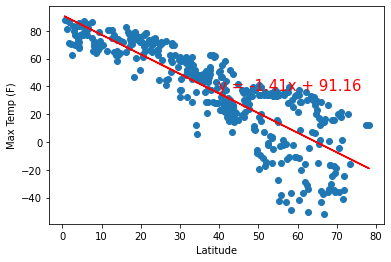

None


<Figure size 432x288 with 0 Axes>

In [147]:
# Plot
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.24306059793972887


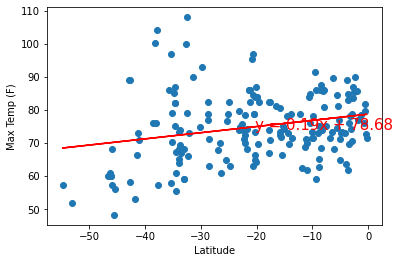

None


<Figure size 432x288 with 0 Axes>

In [148]:
# Plot
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.34926295172465777


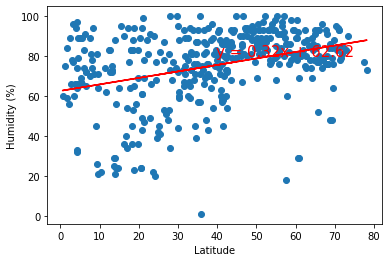

None


<Figure size 432x288 with 0 Axes>

In [149]:
# Plot
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37568756025271627


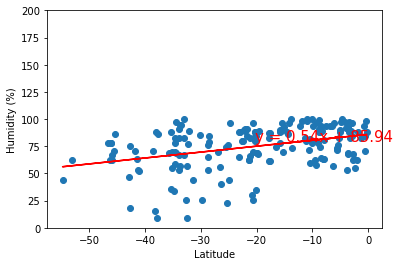

None


<Figure size 432x288 with 0 Axes>

In [150]:
# Plot
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20016864969535073


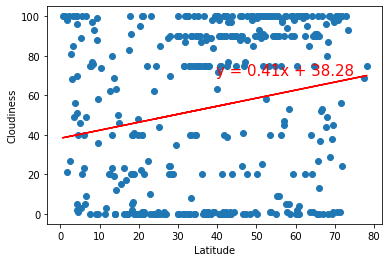

None


<Figure size 432x288 with 0 Axes>

In [151]:
# Plot
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2884440651901529


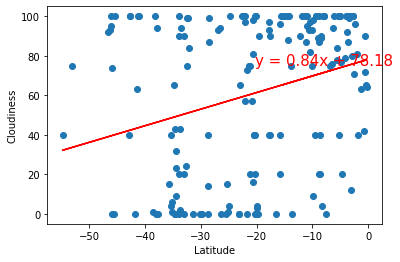

None


<Figure size 432x288 with 0 Axes>

In [152]:
# Plot
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11345044332151107


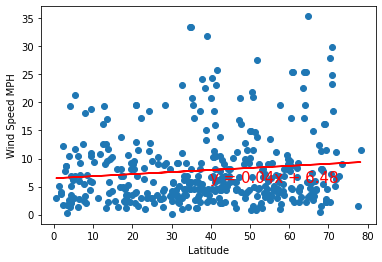

None


<Figure size 432x288 with 0 Axes>

In [157]:
# Plot
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed MPH")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.46481013796491694


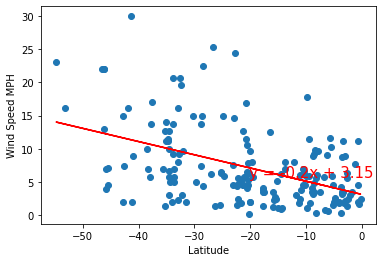

None


<Figure size 432x288 with 0 Axes>

In [158]:
# Plot
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed MPH")
print(linear_reg_plot(x_values,y_values))